In [109]:
# DATA MODELLING
import pandas as pd
import numpy as np

# DATA EXPLORATION - DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,10)

# Contesto
Questo set di dati contiene 48 features estratte da 5000 pagine Web di phishing e 5000 pagine Web legittime, che sono state scaricate da gennaio a maggio 2015 e da maggio a giugno 2017.
I ricercatori e gli esperti anti-phishing possono trovare questo set di dati utile per l'analisi delle caratteristiche del phishing, per condurre rapidi esperimenti di prova concettuale o per confrontare i modelli di classificazione del phishing.
# Obiettivo 
Creare un modello di classificazione del phishing in modo tale da stabilire a priori se un url è pericoloso.


## Load Data

In [110]:
df = pd.read_csv('..\data\Phishing_Legitimate_full.csv', index_col='id')

## Data Exploration

In [111]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000

Non sono presenti valori nulli all'interno del dataset

In [113]:
df.isna().sum().sum()

0

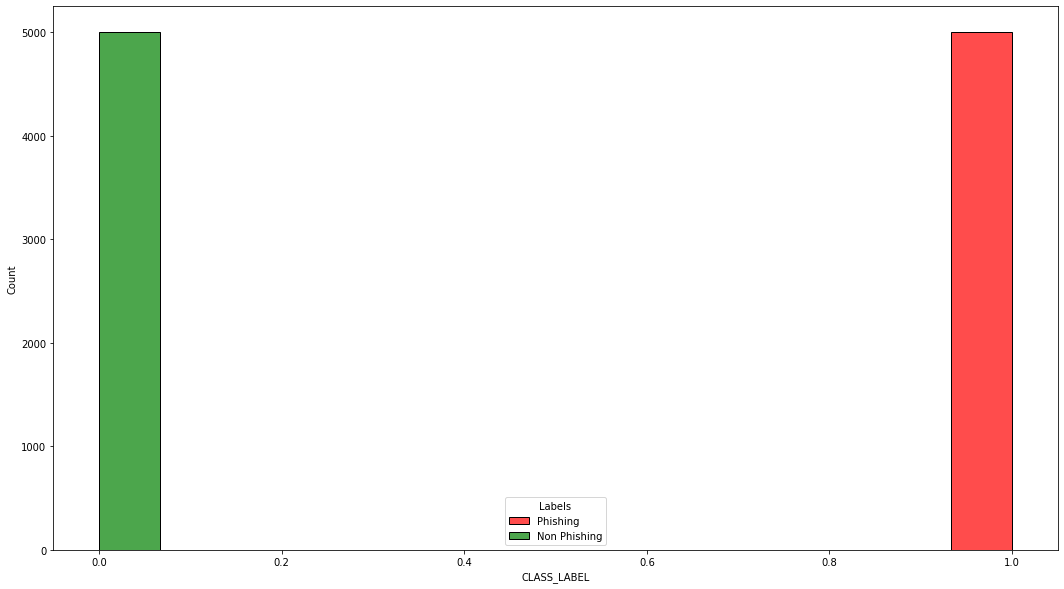

In [114]:
palette ={0: "green", 1: "red"}

sns.histplot(df, x='CLASS_LABEL', hue='CLASS_LABEL', palette=palette, alpha=.7)
plt.legend(['Phishing', 'Non Phishing'], title='Labels')
plt.show()

Diminuisco le dimensioni di storaggio nella memoria per le colonne che contengono integer

In [115]:
# int64 --> int32
df[df.select_dtypes('int64').columns] = df[df.select_dtypes('int64').columns].astype('int32')
# float64 --> float32
df[df.select_dtypes('float64').columns] = df[df.select_dtypes('float64').columns].astype('float32')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000

La matrice di correlazione ci permette di individuare le colonne più significative all'intenro del dataframe.
`HttpsInHostname` è presente in tutte le colonne pertanto non sarà necessario includerlo nell'analisi

<AxesSubplot:>

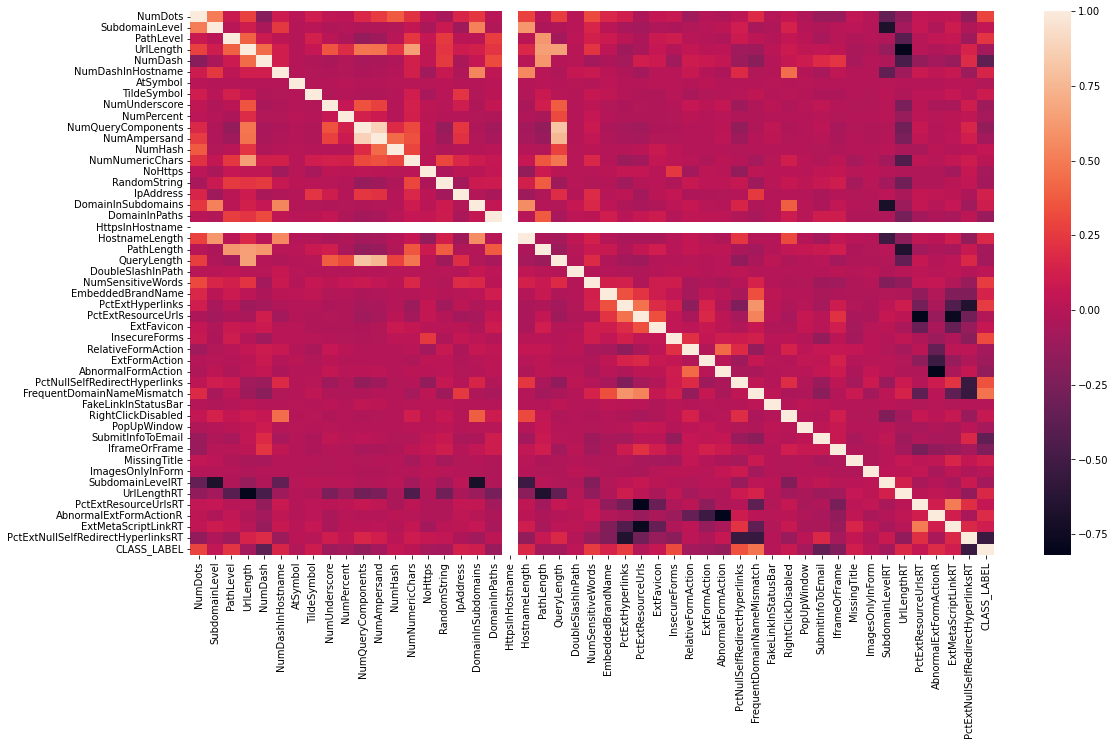

In [117]:
sns.heatmap(df.corr())

In [118]:
def top_correleted_columns(corr: pd.DataFrame, target: str, top_n:int = 5) -> np.array:
    '''Restituisce un array di nomi di colonne che sono più correlate con la colonna di `target`

    :param pd.DataFrame corr: correlazione del dataframe, consiglio di passare data.corr()
    :param str target: nome della colonna di `target`, la y 
    :param int top_n: numero di nomi colonne darestituire, defaults to 5
    '''    
    sorted_corr = corr.loc[target].abs().sort_values(ascending=False)
    return sorted_corr[:top_n+1].index.values

In [119]:
df[top_correleted_columns(df.corr(), "CLASS_LABEL", 15)].corr()

,CLASS_LABEL,PctExtNullSelfRedirectHyperlinksRT,FrequentDomainNameMismatch,NumDash,SubmitInfoToEmail,PctNullSelfRedirectHyperlinks,InsecureForms,NumDots,PctExtHyperlinks,NumSensitiveWords,IframeOrFrame,PathLevel,AbnormalExtFormActionR,UrlLengthRT,HostnameLength,NumDashInHostname
CLASS_LABEL,1.000000,-0.540545,0.463956,-0.372235,-0.357635,0.342806,0.316380,0.294111,0.259728,0.255208,-0.235233,0.229450,0.185799,0.169513,0.169157,0.150444
PctExtNullSelfRedirectHyperlinksRT,-0.540545,1.000000,-0.549630,0.184808,0.174714,-0.548650,-0.181724,-0.153835,-0.656196,-0.125761,-0.069074,-0.095786,-0.051190,-0.155320,-0.143868,-0.113745
FrequentDomainNameMismatch,0.463956,-0.549630,1.000000,-0.188701,-0.179616,0.038521,0.125964,0.177703,0.598203,0.140990,-0.011897,0.028918,0.018324,0.146127,-0.013541,-0.019193
NumDash,-0.372235,0.184808,-0.188701,1.000000,0.181687,-0.113173,-0.091292,-0.198769,-0.070490,-0.081733,0.228154,0.090503,-0.085238,-0.468798,0.010045,0.113200
SubmitInfoToEmail,-0.357635,0.174714,-0.179616,0.181687,1.000000,-0.116218,-0.142389,-0.117766,-0.067086,-0.099405,0.070346,-0.061813,-0.062824,-0.097210,-0.081902,-0.059574
PctNullSelfRedirectHyperlinks,0.342806,-0.548650,0.038521,-0.113173,-0.116218,1.000000,0.093503,0.033516,-0.235334,-0.004827,0.033643,0.085679,0.097234,0.084172,0.235111,0.177997
InsecureForms,0.316380,-0.181724,0.125964,-0.091292,-0.142389,0.093503,1.000000,0.072103,0.120508,0.099788,0.016164,0.099618,-0.111406,0.034117,0.002442,0.011456
NumDots,0.294111,-0.153835,0.177703,-0.198769,-0.117766,0.033516,0.072103,1.000000,0.116726,0.305793,-0.117210,0.079202,0.032276,-0.151756,0.289482,0.093034
PctExtHyperlinks,0.259728,-0.656196,0.598203,-0.070490,-0.067086,-0.235334,0.120508,0.116726,1.000000,0.126763,0.096150,0.018365,-0.047605,0.100971,-0.047201,-0.025364
NumSensitiveWords,0.255208,-0.125761,0.140990,-0.081733,-0.099405,-0.004827,0.099788,0.305793,0.126763,1.000000,-0.092307,0.121805,0.059882,-0.156799,0.130625,0.081098


<AxesSubplot:>

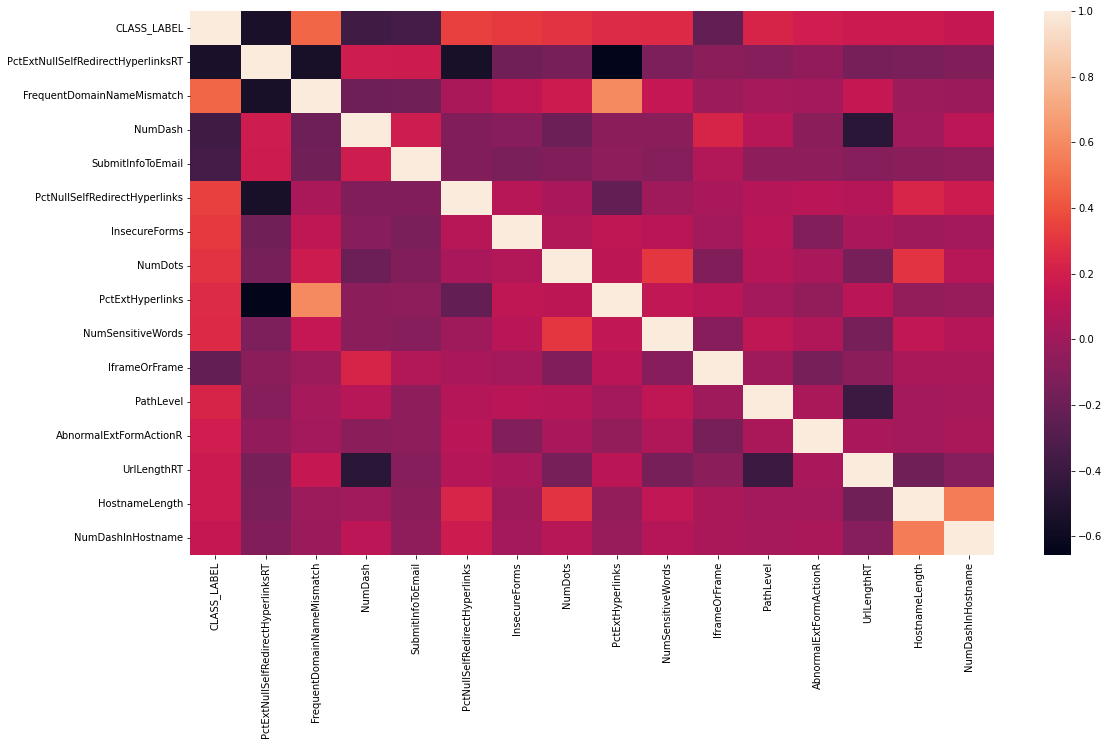

In [120]:
sns.heatmap(df[top_correleted_columns(df.corr(), "CLASS_LABEL", 15)].corr())

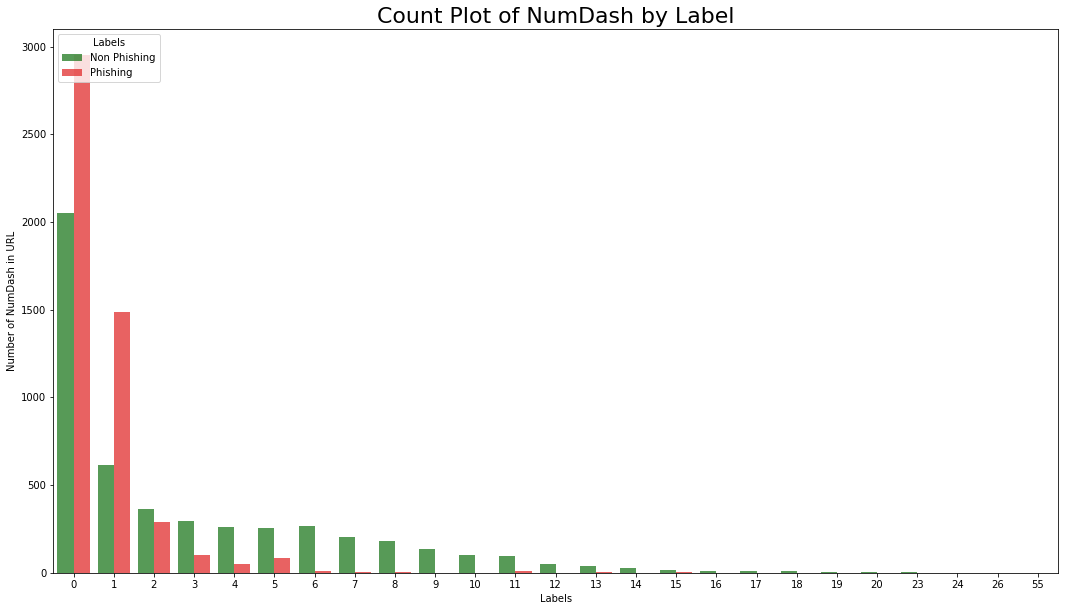

In [121]:
sns.countplot(data=df, x='NumDash', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of NumDash by Label', fontsize=22)
plt.ylabel('Number of NumDash in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

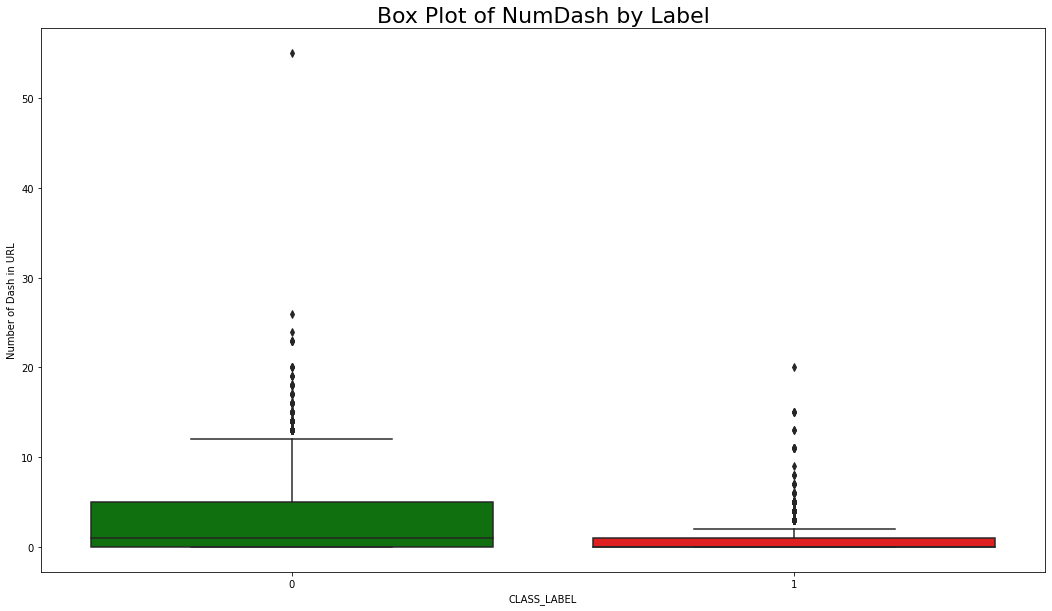

In [122]:
sns.boxplot(x='CLASS_LABEL', y='NumDash', data=df, palette=palette)

plt.title('Box Plot of NumDash by Label', fontsize=22)
plt.ylabel('Number of Dash in URL')
plt.show()

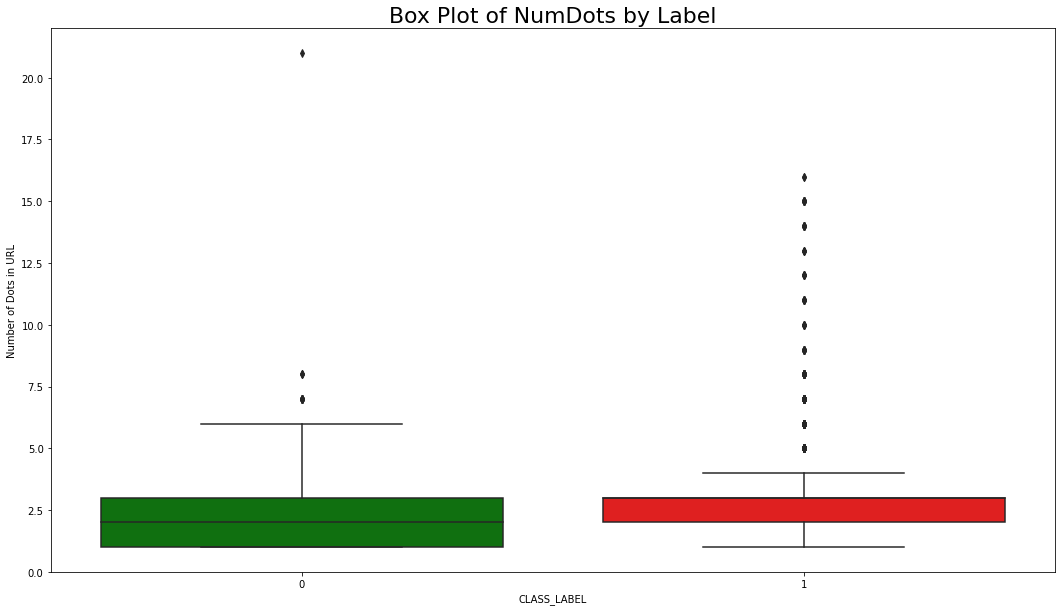

In [123]:
sns.boxplot(x='CLASS_LABEL', y='NumDots', data=df, palette=palette)

plt.title('Box Plot of NumDots by Label', fontsize=22)
plt.ylabel('Number of Dots in URL')
plt.show()

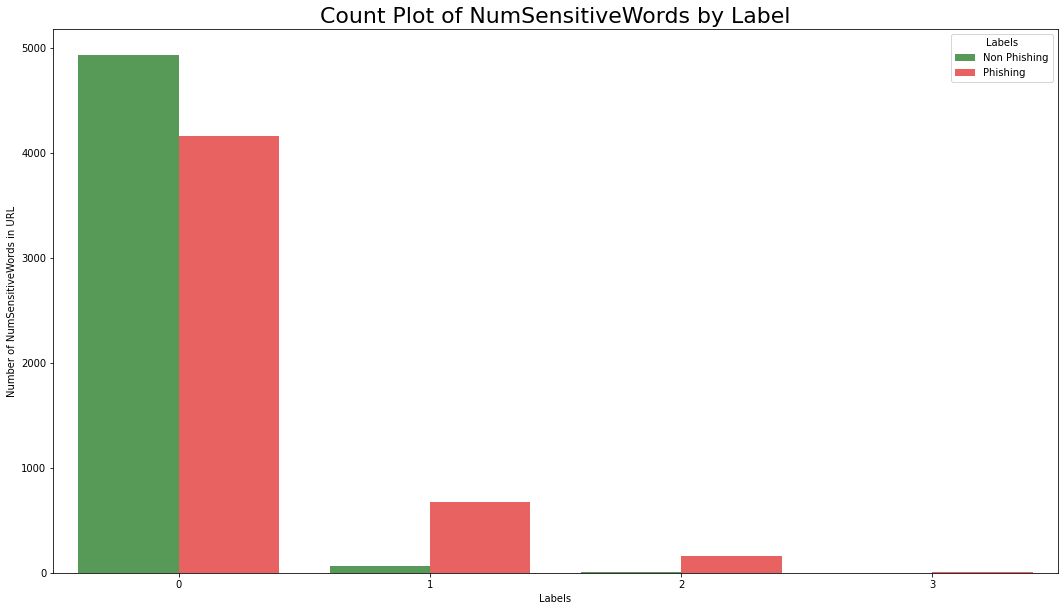

In [124]:
sns.countplot(data=df, x='NumSensitiveWords', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of NumSensitiveWords by Label', fontsize=22)
plt.ylabel('Number of NumSensitiveWords in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

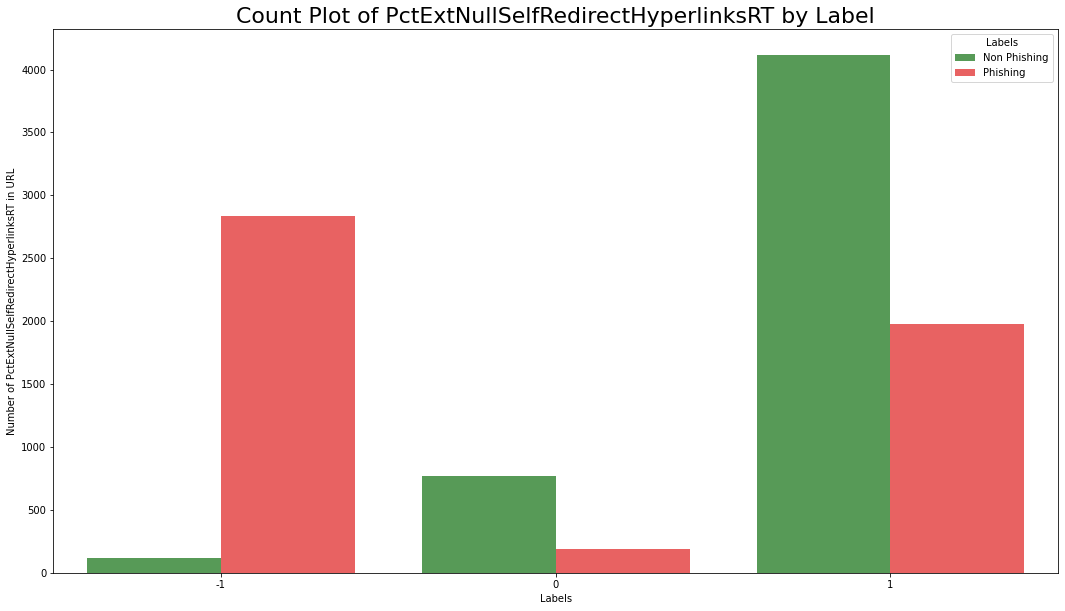

In [125]:
sns.countplot(data=df, x='PctExtNullSelfRedirectHyperlinksRT', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of PctExtNullSelfRedirectHyperlinksRT by Label', fontsize=22)
plt.ylabel('Number of PctExtNullSelfRedirectHyperlinksRT in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

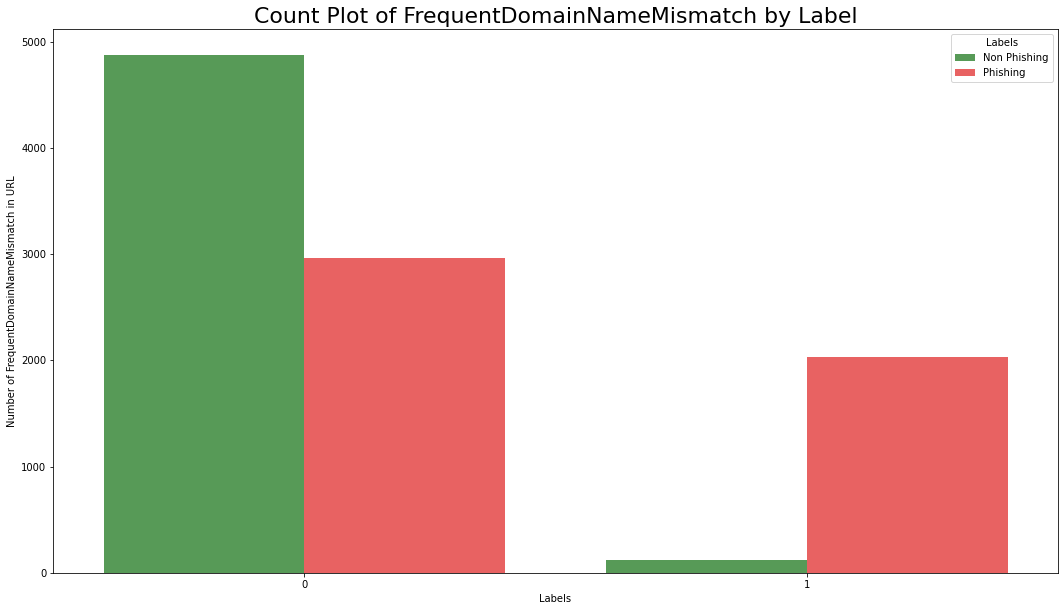

In [126]:
sns.countplot(data=df, x='FrequentDomainNameMismatch', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of FrequentDomainNameMismatch by Label', fontsize=22)
plt.ylabel('Number of FrequentDomainNameMismatch in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

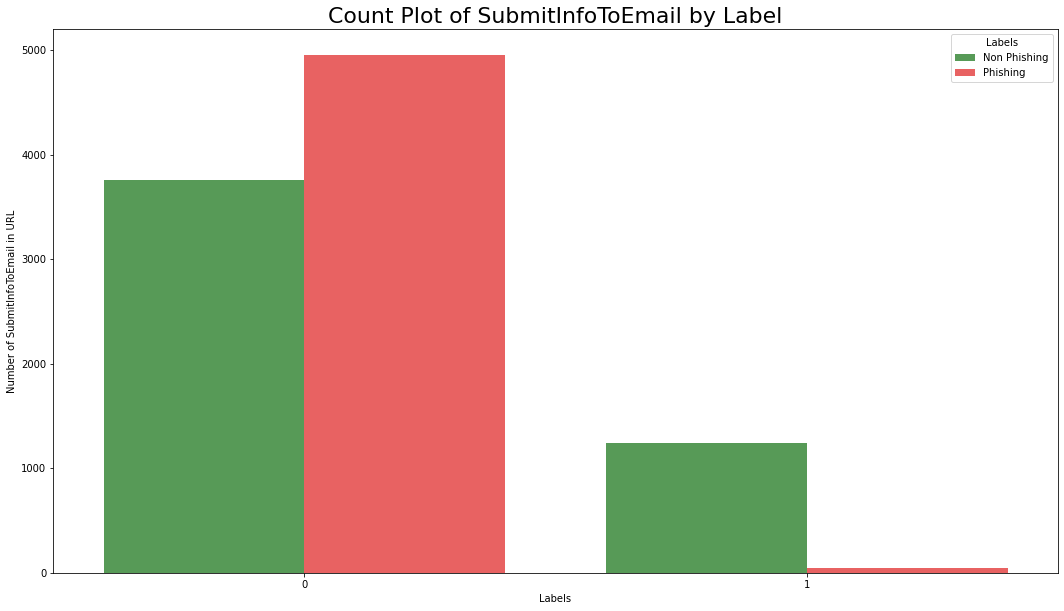

In [127]:
sns.countplot(data=df, x='SubmitInfoToEmail', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of SubmitInfoToEmail by Label', fontsize=22)
plt.ylabel('Number of SubmitInfoToEmail in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

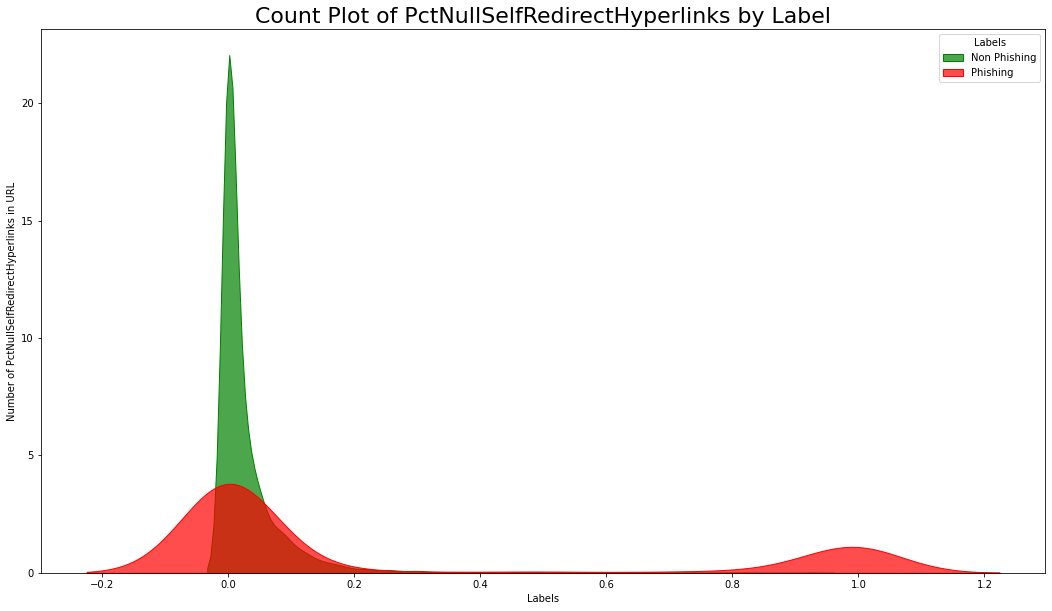

In [128]:
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 0, "PctNullSelfRedirectHyperlinks"], shade=True, color="green", label="Non Phishing", alpha=.7)
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 1, "PctNullSelfRedirectHyperlinks"], shade=True, color="red", label="Phishing", alpha=.7)


plt.title('Count Plot of PctNullSelfRedirectHyperlinks by Label', fontsize=22)
plt.ylabel('Number of PctNullSelfRedirectHyperlinks in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

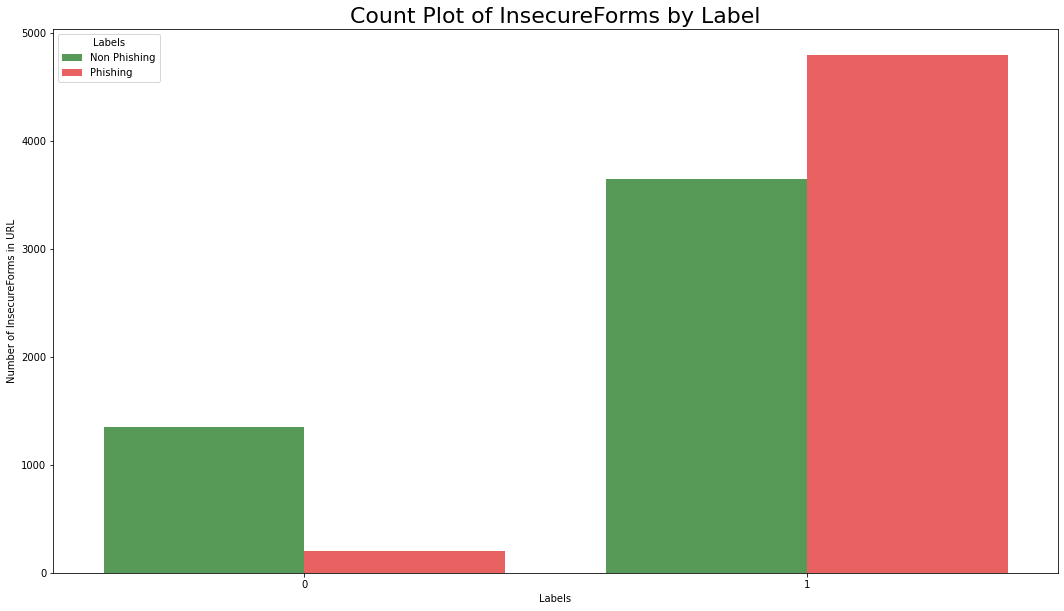

In [129]:
sns.countplot(data=df, x='InsecureForms', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of InsecureForms by Label', fontsize=22)
plt.ylabel('Number of InsecureForms in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

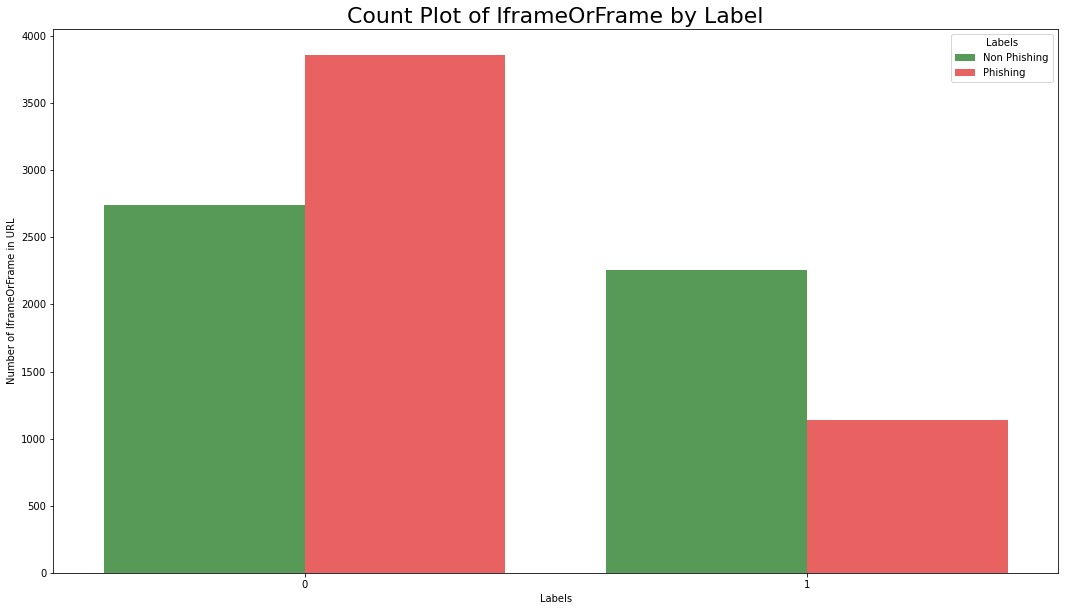

In [130]:
sns.countplot(data=df, x='IframeOrFrame', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of IframeOrFrame by Label', fontsize=22)
plt.ylabel('Number of IframeOrFrame in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

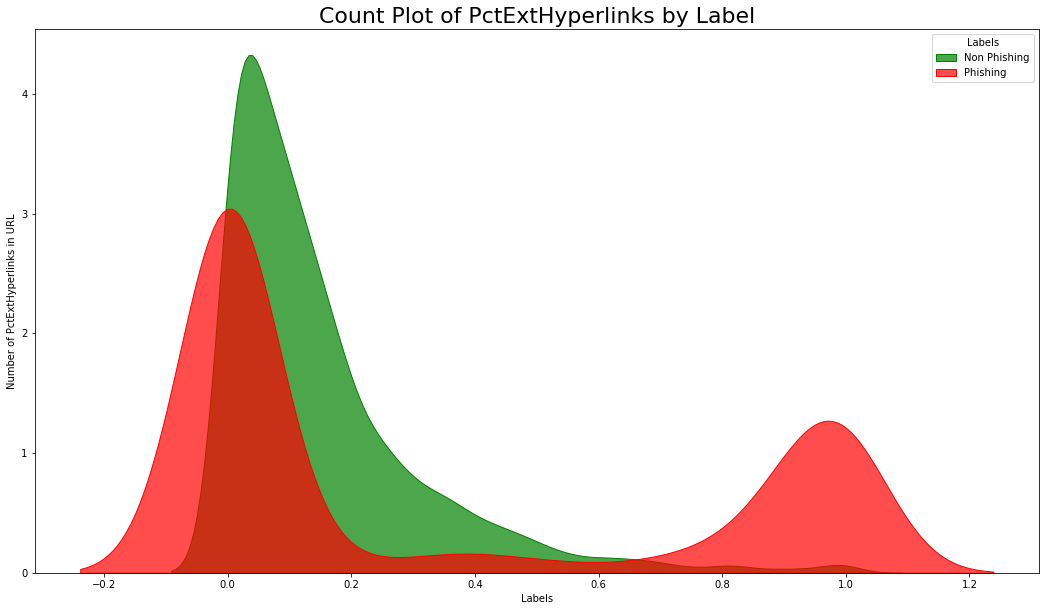

In [131]:
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 0, "PctExtHyperlinks"], shade=True, color="green", label="Non Phishing", alpha=.7)
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 1, "PctExtHyperlinks"], shade=True, color="red", label="Phishing", alpha=.7)

plt.title('Count Plot of PctExtHyperlinks by Label', fontsize=22)
plt.ylabel('Number of PctExtHyperlinks in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()
# IMPORTANTE

## Set Features and Target

In [132]:
from sklearn.model_selection import train_test_split


X = df[top_correleted_columns(df.corr(), "CLASS_LABEL", 15)].drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [133]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [134]:
accuracy_score(y_test, y_pred)

0.9769696969696969

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1622
           1       0.98      0.97      0.98      1678

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [136]:
def evaluete_model(estimator, df: pd.DataFrame, target) -> pd.DataFrame:
    models = []
    # ciclo che aggiunge alle features una colonna alla volta
    for i in range(1, df.shape[1]):
        X = df[top_correleted_columns(df.corr(), target, i)].drop(target, axis=1)
        y = df['CLASS_LABEL']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
        clf = estimator
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        resoconto = {
            'n_colonne': i,
            'features': X.columns.to_list(),
            'accuracy_score': accuracy_score(y_test, y_pred)}
        
        models.append(resoconto)
    
    return pd.DataFrame(models)

In [137]:
df_rfc = evaluete_model(RandomForestClassifier(), df, "CLASS_LABEL")

In [138]:
from sklearn.linear_model import LogisticRegression

df_lr  = evaluete_model(LogisticRegression(), df, "CLASS_LABEL")

c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [139]:
from sklearn.svm import LinearSVC

df_svm = evaluete_model(LinearSVC(), df, "CLASS_LABEL")

c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Matteo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

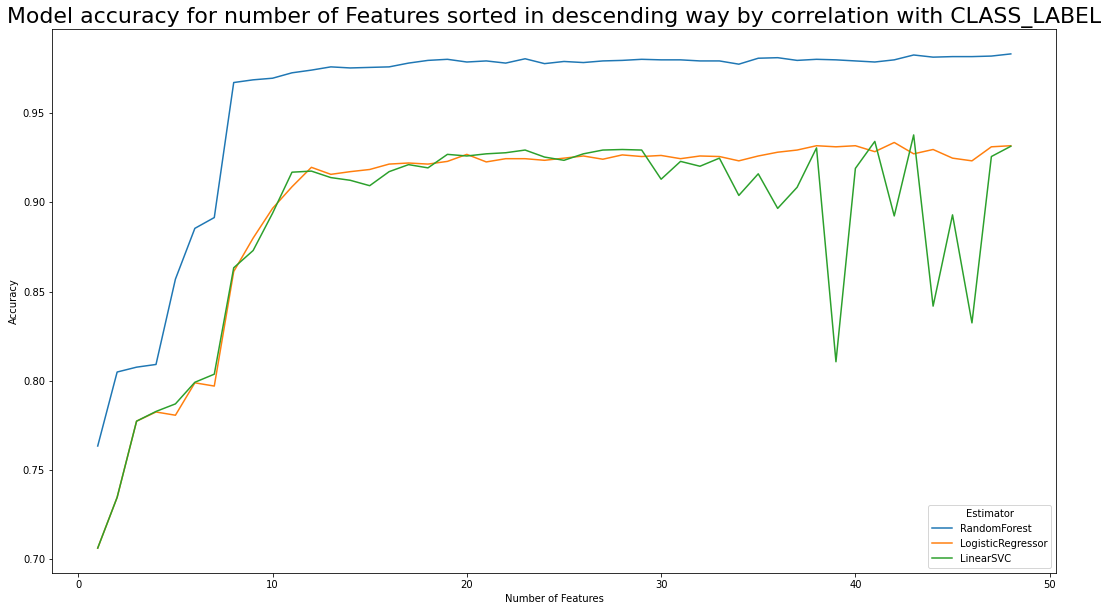

In [140]:
sns.lineplot(data=df_rfc, x='n_colonne', y='accuracy_score', err_style="bars")
sns.lineplot(data=df_lr, x='n_colonne', y='accuracy_score', err_style="bars")
sns.lineplot(data=df_svm, x='n_colonne', y='accuracy_score', err_style="bars")
plt.title('Model accuracy for number of Features sorted in descending way by correlation with CLASS_LABEL',  fontsize=22)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend(['RandomForest', 'LogisticRegressor', 'LinearSVC'], loc='lower right', title='Estimator')
plt.show()

Analizzando il grafico ottenuto, e i dati all'interno dei dataframes precedentemente creati, possiamo notare che tutti i modelli migliorano la prorpia accuracy vertiginosamente quando viene considerata la feature che viene ciclata per ottava, stiamo parlando di `PctExtHyperlinks`

In [141]:
df_rfc.head(10)

,n_colonne,features,accuracy_score
0,1,[PctExtNullSelfRedirectHyperlinksRT],0.763333
1,2,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.804848
2,3,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.807576
3,4,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.809091
4,5,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.856970
5,6,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.885455
6,7,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.891515
7,8,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.967273
8,9,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.968788
9,10,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.969697


In [142]:
df_lr.head(10)

,n_colonne,features,accuracy_score
0,1,[PctExtNullSelfRedirectHyperlinksRT],0.706061
1,2,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.734545
2,3,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.777273
3,4,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.782424
4,5,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.780606
5,6,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.798788
6,7,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.796970
7,8,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.861212
8,9,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.880000
9,10,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.896667


In [143]:
df_svm.head(10)

,n_colonne,features,accuracy_score
0,1,[PctExtNullSelfRedirectHyperlinksRT],0.706061
1,2,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.734545
2,3,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.777273
3,4,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.782727
4,5,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.786970
5,6,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.799091
6,7,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.803636
7,8,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.863333
8,9,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.873030
9,10,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.893939


Effettuiamo la controprova, escludendo dalle features di train questa colonna mi aspetto che l'accuracy diminuisca anche con l'aumentare delle features

In [144]:
features = df_rfc.at[10, 'features']
features

['PctExtNullSelfRedirectHyperlinksRT',
 'FrequentDomainNameMismatch',
 'NumDash',
 'SubmitInfoToEmail',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'IframeOrFrame',
 'PathLevel']

In [145]:
no_best_feature = features.copy()
no_best_feature.remove('PctExtHyperlinks')
no_best_feature

['PctExtNullSelfRedirectHyperlinksRT',
 'FrequentDomainNameMismatch',
 'NumDash',
 'SubmitInfoToEmail',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'NumSensitiveWords',
 'IframeOrFrame',
 'PathLevel']

In [146]:
X = df[no_best_feature]
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9275757575757576

In [147]:
X = df[df_rfc.loc[9, 'features']]
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9718181818181818

Possiamo affermare che `PctExtHyperlinks` è tra le feature più significative all'interno del dataset per quanto riguarda la classificazione della colonna di target `CLASS_LABEL`